In [68]:
import numpy as np
import matplotlib.pyplot as plt

#y = np.loadtxt("d:/datasets/uci/gisette/gisette_train.labels", delimiter=',')
#x = np.loadtxt("d:/datasets/uci/gisette/gisette_train.data")
y = np.loadtxt("d:/datasets/uci/madelon/madelon_train.labels", delimiter=',')
x = np.loadtxt("d:/datasets/uci/madelon/madelon_train.data")
#y = np.loadtxt("d:/datasets/uci/dexter/dexter_train.labels", delimiter=',')
#x = np.loadtxt("d:/datasets/uci/dexter/dexter_train.csv", delimiter=',')
mx=np.mean(x,axis=0)
sx=np.std(x,axis=0)
sx[sx==0]=0.00001
x=(x-mx)/sx
n,d=x.shape

In [69]:
#yt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.labels", delimiter=',')
#xt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.data")
yt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.data")
#yt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.labels", delimiter=',')
#xt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.csv", delimiter=',')
xt=(xt-mx)/sx
#yt[yt<0]=0
yt=yt[:, np.newaxis]
yt.shape

(600, 1)

In [70]:
ys=y.copy()
y[y<0]=0
y=y[:, np.newaxis]
ys=ys[:, np.newaxis]
y.shape

(2000, 1)

In [50]:
ys=ys[:, np.newaxis]
ys.shape

(6000, 1)

In [71]:
def err(x,y,w):
    xw=np.matmul(x,w)
    yxw=y*xw
    return np.mean(yxw<=0)
def loss(x,y,w):
    xw=np.matmul(x,w)
    yxw=y*xw
    l=np.log(1+np.exp(-yxw))
    #print(l.shape)
    l[yxw<0]=-yxw[yxw<0]+np.log(1+np.exp(yxw[yxw<0]))
    lo=np.mean(l)
    #print(lo.shape)
    return lo
def gradloss(x,y,w):
    xw=np.matmul(x,w)
    N,d=x.shape
    yd=1/(1+np.exp(-xw))
    yd=y-yd
    #yd1 = yd[:, np.newaxis]
    ydx=np.matmul(yd.T,x)
    g=ydx.T/N
    #print(g.shape)
    return g

29
train err=0.3595, test err=0.433333



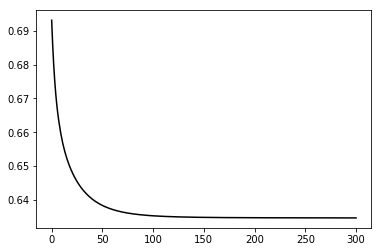

In [95]:
w=np.zeros((d,1))
la=0.0024
eta=0.1
lg=[loss(x,y,w)];
for i in range(0,300):
    g=gradloss(x,y,w)
    w=w+eta*g;
    #print(w.shape)
    w[np.abs(w)<la]=0
    lg.append(loss(x,ys,w)) 
print(np.sum(np.abs(w)>0))
print("train err=%g, test err=%g\n"%(err(x,ys,w),err(xt,yt,w)))
plt.plot(lg,'k')
plt.savefig('c:/tmp/loss.png', dpi = 300)
plt.show()
plt.close()

In [43]:
xw=np.matmul(x,w)
py=np.sign(xw)
py[py<0]=0
1-np.mean(py==y)

0.0

In [44]:
xw=np.matmul(xt,w)
py=np.sign(xw)
py[py<0]=0
1-np.mean(py==yt)

0.14

In [25]:
py[0:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [26]:
yt[0:10]

array([1., 1., 0., 1., 1., 0., 0., 0., 0., 0.])